In [1]:
# Carga de librerías requeridas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate

In [2]:
# Cargar archivos de datos

data = pd.read_table('db_data_500_x_500.dat', names=['s2','dm','ji'],delim_whitespace=True)
data_cl68 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl68.dat', names=['s2','dm'], delim_whitespace=True)
data_cl95 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl95.dat', names=['s2','dm'], delim_whitespace=True)
data_cl99 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl99.dat', names=['s2','dm'], delim_whitespace=True)

In [3]:
# Obtención del ji minímo de los datos y sus correspondientes parámetros de oscilación

s2_min = data.iloc[data['ji'].idxmin()][0]
dm_min = data.iloc[data['ji'].idxmin()][1]
ji_min = data.iloc[data['ji'].idxmin()][2]
s2_min, dm_min, ji_min

(0.0858689480795409, 0.0025204, 181.60973362859326)

In [4]:
# Restando el ji_min a la columna de ji
data['ji']=data['ji']-ji_min
data['ji'].min()

0.0

In [5]:
def get_interpolated_data_2D(df,size):
     
    x=df['s2'].drop_duplicates().to_numpy()
    y=df['dm'].drop_duplicates().to_numpy()
    z=df.ji.values                

    f = interpolate.interp2d(x, y, z, kind='cubic')

    x_new=np.linspace(x[0], x[-1],size)
    y_new=np.linspace(y[0], y[-1],size)
    z_for_my=f(x_new,y_new)
    z_for_my=z_for_my.T
    z_new=z_for_my.reshape(size*size)
    
    x=[]
    y=[]
    for i in x_new:
        for j in y_new:
            x.append(i)
            y.append(j)
    data_new = pd.DataFrame({'s2':x,'dm':y,'ji':z_new})
    
    idx_min        = data_new['ji'].idxmin()
    ji_min         = data_new['ji'][idx_min]
    data_new['ji'] = data_new['ji'] - ji_min
    dic={'new_min_after_interpolation':ji_min,'min_nom_arfter_interp':data_new['ji'].min()}
    print(dic)
    return data_new

In [6]:
data=get_interpolated_data_2D(data,5000)

{'new_min_after_interpolation': -2.509325108755461e-05, 'min_nom_arfter_interp': 0.0}


In [7]:
# Filtrando datos por nivel de confianza

data_68=data[(data['ji'] <=  2.30) & (data['ji'] >=  2.28)][['s2','dm']]
data_95=data[(data['ji'] <=  6.18) & (data['ji'] >=  6.10)][['s2','dm']]
data_99=data[(data['ji'] <= 11.83) & (data['ji'] >= 11.75)][['s2','dm']]

data_68.to_csv('db_confidence_region_68.csv',sep=' ',index=False, header=False)
data_95.to_csv('db_confidence_region_95.csv',sep=' ',index=False, header=False)
data_99.to_csv('db_confidence_region_99.csv',sep=' ',index=False, header=False) 

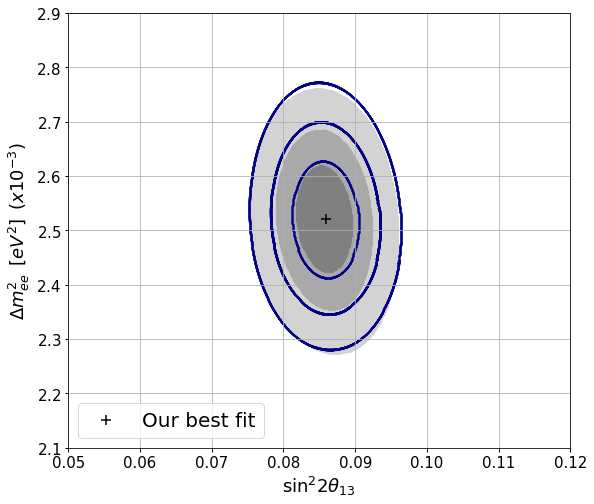

In [8]:
# Graficando datos en regiones de confianza

fig,ax=plt.subplots(figsize=(9, 8))
size=0.01
ax.scatter(data_cl68['s2'].to_numpy(),data_cl68['dm'].to_numpy(),c='gray')#,label='68% of C.L. from Daya Bay')
ax.scatter(data_cl95['s2'].to_numpy(),data_cl95['dm'].to_numpy(),c='darkgray')#,label='95% of C.L. from Daya Bay')
ax.scatter(data_cl99['s2'].to_numpy(),data_cl99['dm'].to_numpy(),c='lightgray')#,label='99% of C.L. from Daya Bay')
ax.scatter(  data_68['s2'].to_numpy(),  data_68['dm'].to_numpy(),s=size,c='darkblue')#, label=r'68% of C.L. from $\chi^2_{DB}$')
ax.scatter(  data_95['s2'].to_numpy(),  data_95['dm'].to_numpy(),s=size,c='darkblue')#, label= '95% of C.L. from $\chi^2_{DB}$')
ax.scatter(  data_99['s2'].to_numpy(),  data_99['dm'].to_numpy(),s=size,c='darkblue')#, label= '99% of C.L. from $\chi^2_{DB}$')
ax.scatter(s2_min,dm_min,c='black',marker='+' ,label='Our best fit',s=100)

# Limites en los ejes
ax.set_xlim(0.05, 0.12)
ax.set_ylim(00.0021, 0.0029)

ax.set_xticks([0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12])
ax.set_yticks([0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029])

ax.set_yticklabels(['$2.1$','$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$','$2.9$'])

# Plot legend.
lgnd=ax.legend()
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=20)
#lgnd.legendHandles[3]._sizes = [30]
#lgnd.legendHandles[4]._sizes = [30]
#lgnd.legendHandles[5]._sizes = [30]
#lgnd.legendHandles[6]._sizes = [30]
#ax.xaxis.label.set_size(15)
#ax.yaxis.label.set_size(15)

# Label settings
ax.tick_params(labelcolor='black', labelsize=18, width=1)
ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=15, width=1)
fig.savefig("db_confidence_region_DB.png")
plt.show()

# Perfil ( $\Delta \chi^2$, $\sin^2 2\theta_{13}$)

In [9]:
# Obtención de datos para el perfil
s2_min_p = data.iloc[data['ji'].idxmin()][0]
dm_min_p = data.iloc[data['ji'].idxmin()][1]
ji_min_p = data.iloc[data['ji'].idxmin()][2]
s2_profile=data[data['dm']==dm_min_p][['s2','ji']]
s2_profile.to_csv('db_profile_ji_s22t13.csv',sep=' ',index=False, header=False) 
parabol_s2=pd.read_table("../../daya_for_global_analysis/db_data/db_profile_s2.dat", names=['s2','ji'], delim_whitespace=True)

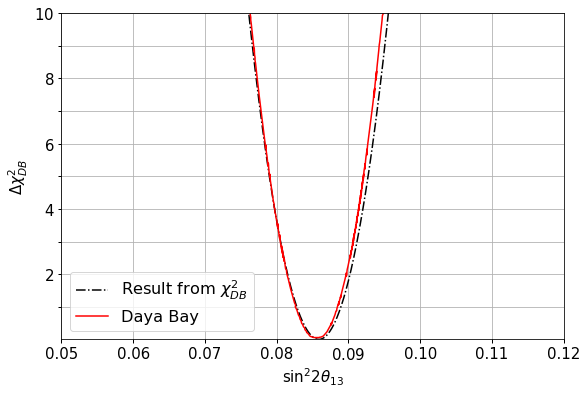

In [27]:
# Gráfica de (  Δ𝜒2 ,  sin22𝜃13 )
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(s2_profile['s2'].to_numpy(),s2_profile['ji'].to_numpy(),c='black',linestyle='-.',label=r'Result from $\chi^2_{DB}$')
ax.plot(parabol_s2['s2'].to_numpy(),parabol_s2['ji'].to_numpy(),c='red', linestyle='-',label=r'Daya Bay')

ax.legend()
ax.set_xlim(0.05, 0.12)
ax.set_ylim(0.0, 10)
ax.grid(True, linestyle='-')

ax.set_xticks([0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12])
ax.set_xticklabels(['0.05','0.06','0.07','0.08','$0.09$','0.10','0.11','0.12'])

ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])


lgnd = plt.legend(loc="lower left", fontsize=16.2)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2_{DB}$')
fig.savefig("db_parabol_s22t13.png")

In [11]:
s2_left=0.08279652793264665
s2_right=0.08895179179531662

s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min

(s2_sigma_left,s2_sigma_right)

(0.003072420146894253, 0.0030828437157757183)

# Perfil( $\Delta \chi^2$, $\Delta m^2_{ee}$)

In [12]:
# Obtención de datos para el perfil
dm_profile=data[data['s2']==s2_min_p][['dm','ji']]
dm_profile.to_csv('db_profile_ji_dm.csv',sep=' ',index=False, header=False) 
parabol_dmee=pd.read_table('../../daya_for_global_analysis/db_data/db_profile_dm.dat',names=['dm','ji'],delim_whitespace=True)

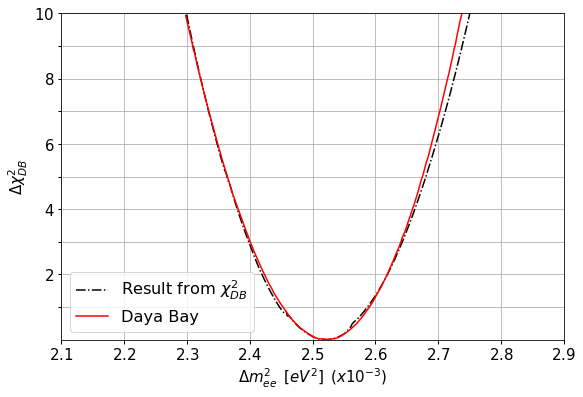

In [28]:
#Gráfica
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dm_profile['dm'],             dm_profile['ji'],             linestyle='-.',c='black',label=r'Result from $\chi^2_{DB}$')
ax.plot(parabol_dmee['dm'].to_numpy(),parabol_dmee['ji'].to_numpy(),linestyle='-',c='red',label=r'Daya Bay')

ax.legend()
ax.set_xlim(0.0021, 0.0029)
ax.set_ylim(0.0, 10)
ax.grid(True, linestyle='-')

ax.set_xticks([0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['$2.1$','$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$','$2.9$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])

lgnd = plt.legend(loc="lower left", fontsize=16.2)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)

ax.set(xlabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$', ylabel=r'$\Delta \chi^2_{DB} $')
fig.savefig("db_parabol_dmee.png")

In [21]:
dm_left =0.00244723624724945
dm_right=0.02587383476695339

dm_sigma_left=dm_min-dm_left
dm_sigma_right=dm_right-dm_min

(dm_sigma_left,dm_sigma_right)

(7.316375275055005e-05, 0.023353434766953392)